# Data on the Blockchain
In this report we look into how we can exract data from the blockchain

In [29]:
from dotenv import load_dotenv
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.ticker import FuncFormatter

load_dotenv()
api_key = os.getenv("DUNE_API_KEY")

# define helper functions

def money_formatter(x, pos):
    return "${:,.0f}".format(x)

def percent_formatter(x, pos):
    return "{:.2f}%".format(x)

def get_data(url, api_key=api_key, index_col='day'):
    try:
        response = requests.get(url+ f'?api_key={api_key}')
        data = response.json()
        df = pd.DataFrame(data['result']['rows'])
        df.index = pd.to_datetime(df[index_col])
        del df[index_col]
        df = df.sort_index()
        return df
    except Exception as e:
        print(e)
        raise e
    
    
money_formatter = FuncFormatter(money_formatter)
percent_formatter = FuncFormatter(percent_formatter)

## Extracting Knowledge from Blockchain Networks

Blockchain technology and its public ledgers are akin to a data goldmine, offering unprecedented access and transparency. Unlike traditional finance (trad-fi) systems, which are typically closed and proprietary, blockchain operates as a publicly accessible database. Smart contracts on these platforms hold and change states in ways that are observable to anyone with the right tools. With access to an RPC node and systems to track state changes and events, we can delve into this wealth of information with relative ease.

While the prospect is exciting, it requires a certain level of technical know-how. For instance, beyond measuring high-level blockchain statistics, one can delve into the intricacies of protocols operating on these blockchains. Consider money markets like Aave, Compound, and MakerDAO on the Ethereum network, which consist of potentially hundreds of smart contracts that keep the ecosystem running. The challenge lies in how to mine this data effectively, especially for those who might be more familiar with traditional data querying tools like SQL.

## Processing Blockchain Data:
Dune Analytics emerges as a solution to this challenge. It serves as a bridge, turning complex blockchain data into an accessible resource for analysis. While I won't dive deep into the technicalities here, further details can be explored in this comprehensive guide.

In our current study, we'll examine the Aave protocol, aiming to dynamically analyze various aspects, including:

* The behavior of staking yields
* The dynamics between collateral and debt
* Borrowing and repayment patterns within the protocol

`The vast majority of this data is provided by @KARTOD` [link](https://dune.com/KARTOD/AAVE-Mega-Dashboard) 

In [16]:
cum_stkAAVE_df = get_data(f'https://api.dune.com/api/v1/query/155127/results')
print(cum_stkAAVE_df.head())


                           aave_price    aave_reward       apy   apy_now  \
day                                                                        
2022-01-17 00:00:00+00:00  231.241806  127182.993056  0.067288  6.728832   
2022-01-18 00:00:00+00:00  231.281736  127204.954861  0.066891  6.689135   
2022-01-19 00:00:00+00:00  220.059549  121032.751736  0.066883  6.688272   
2022-01-20 00:00:00+00:00  213.825937  117604.265625  0.066933  6.693310   
2022-01-21 00:00:00+00:00  186.292847  102461.065972  0.066961  6.696107   

                           cumulative_staked    net_staked  
day                                                         
2022-01-17 00:00:00+00:00       2.983430e+06  -2763.821131  
2022-01-18 00:00:00+00:00       3.001135e+06  17705.468903  
2022-01-19 00:00:00+00:00       3.001523e+06    387.394751  
2022-01-20 00:00:00+00:00       2.999264e+06  -2259.171022  
2022-01-21 00:00:00+00:00       2.998011e+06  -1252.983990  


## Observations
Correlation between staking and yield: There is an evident correlation between the amount staked and the yield, which is common in staking ecosystems. The more assets there are staked, the lower the yield becomes, assuming the total reward pool remains constant.


Impact of market events: The spikes and drops in the graph could be correlated with market events. It would be useful to overlay market price data for AAVE to see if these changes correspond with significant price movements.


Staking incentives: The relationship between staked amounts and rewards could indicate how incentives impact staker behavior. It’s important to analyze how changes in rewards impact staking and unstaking actions.
Seasonality and patterns: Are there patterns or seasonal behaviors in staking? For example, do users tend to stake/unstake during certain months?

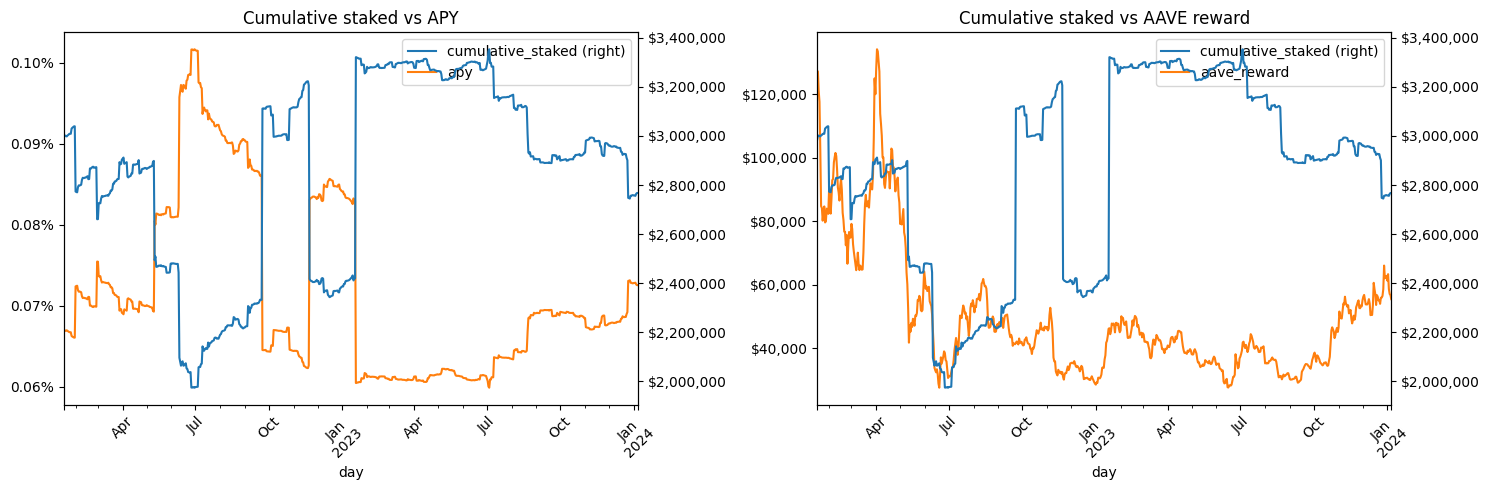

In [35]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

cum_stkAAVE_df[['cumulative_staked', 'apy']].plot(ax=axes[0], secondary_y=['cumulative_staked'])
axes[0].set_title('Cumulative staked vs APY')
axes[0].tick_params(axis='x', rotation=45)  # Rotate X axis labels
axes[0].yaxis.set_major_formatter(percent_formatter)
axes[0].right_ax.yaxis.set_major_formatter(money_formatter)


cum_stkAAVE_df[['cumulative_staked', 'aave_reward']].plot(ax=axes[1], secondary_y=['cumulative_staked'])
axes[1].set_title('Cumulative staked vs AAVE reward')
axes[1].tick_params(axis='x', rotation=45)  # Rotate X axis labels
axes[1].yaxis.set_major_formatter(money_formatter)
axes[1].right_ax.yaxis.set_major_formatter(money_formatter)
plt.tight_layout()
plt.show()

In [20]:
aave_raw_df = get_data(f'https://api.dune.com/api/v1/query/1950532/results')
aave_raw_df

,BTC,Total_Borrow_volume,Total_Borrowers,Total_Borrows,Total_Depositors,Total_Deposits,Total_Deposits_volume,Total_Repay_volume,Total_Repayers,Total_Repays,Total_Withdraw_users,Total_Withdrawal_volume,Total_Withdrawals
day,,,,,,,,,,,,,
2023-01-27 00:00:00+00:00,23016.665729,3.028278e+06,42,68,128,170,8.797323e+06,4.325317e+05,7,10,14,2.194823e+05,19
2023-01-28 00:00:00+00:00,23041.549236,4.930635e+06,63,77,149,183,2.557177e+07,2.519257e+06,10,20,20,1.421649e+07,37
2023-01-29 00:00:00+00:00,23445.434549,5.392434e+06,77,88,137,169,2.087834e+07,2.610779e+05,10,14,21,5.337506e+06,36
2023-01-30 00:00:00+00:00,23299.302292,6.208409e+06,53,59,126,146,2.055821e+07,1.104868e+06,8,12,21,5.196229e+06,27
2023-01-31 00:00:00+00:00,22976.725417,4.027119e+06,53,63,120,140,1.010995e+07,3.124337e+05,12,13,18,1.782194e+06,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-21 00:00:00+00:00,41750.648299,6.041893e+07,171,190,201,258,1.484717e+09,2.566908e+07,75,144,120,1.469345e+09,212
2024-01-22 00:00:00+00:00,40778.036667,2.325099e+08,229,297,352,510,3.166458e+09,1.481145e+08,136,321,157,3.059469e+09,394
2024-01-23 00:00:00+00:00,39449.042049,1.090044e+08,305,390,494,698,3.505909e+09,1.938194e+08,202,387,244,3.525846e+09,557


In [21]:
liquidations_df = get_data(f'https://api.dune.com/api/v1/query/1955184/results')
liquidations_df

,collateral_amount_usd,debt_amount_usd,liquidations,liquidators,total_liquidated_collateral,total_liquidations
day,,,,,,
2023-01-01 00:00:00+00:00,1.251775e+03,1.266553e+03,1,1,1.251775e+03,1
2023-02-01 00:00:00+00:00,8.502713e+04,7.822692e+04,3,2,8.627891e+04,4
2023-03-01 00:00:00+00:00,2.246306e+05,2.054167e+05,27,6,3.109095e+05,31
2023-04-01 00:00:00+00:00,1.828251e+05,1.738183e+05,24,10,4.937346e+05,55
2023-05-01 00:00:00+00:00,3.403494e+04,3.137688e+04,8,5,5.277696e+05,63
2023-06-01 00:00:00+00:00,7.670869e+05,6.782200e+05,42,10,1.294856e+06,105
2023-07-01 00:00:00+00:00,5.332834e+05,4.965537e+05,30,8,1.828140e+06,135
2023-08-01 00:00:00+00:00,1.015516e+07,9.005461e+06,102,14,1.198330e+07,237
2023-09-01 00:00:00+00:00,3.317278e+05,3.037032e+05,54,14,1.231503e+07,291


## Data Operations and Metric Computation
In this section, we'll demonstrate the process of computing straightforward metrics using Python's Pandas library. By executing a full data processing cycle, which involves raw data extraction, SQL querying, and DataFrame manipulation, we can create powerful workflows for in-depth data analysis. Here's how we can implement a simple heuristic for calculating the reserve metric:

1. Raw Data Retrieval: We begin by pulling raw data directly from the blockchain or via platforms like Dune Analytics.

2. SQL Transformation: Next, we use SQL queries to refine and filter the raw data, extracting only the relevant pieces of information we need for our analysis.

3. DataFrame Conversion: The output from our SQL queries is then converted into a Pandas DataFrame. This allows us to leverage the robust data manipulation capabilities of Pandas.

By applying this methodology, we can craft nearly limitless workflows that cater to specific analytical requirements, enabling us to dissect and interpret data in any number of ways.

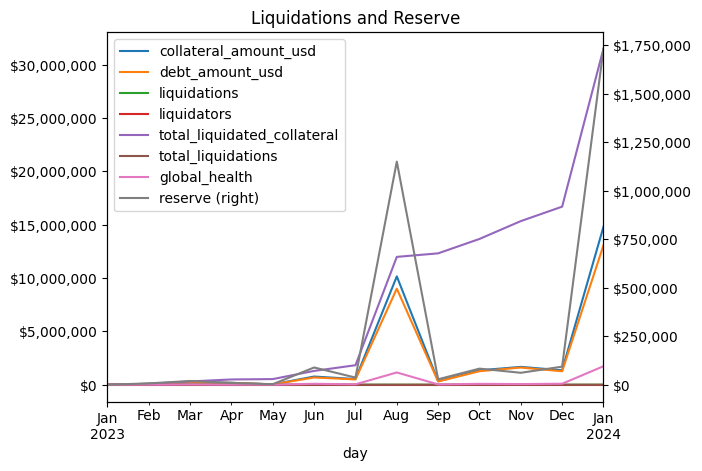

In [32]:
liquidations_df['reserve'] = (liquidations_df['collateral_amount_usd'] - liquidations_df['debt_amount_usd'])

# Create the plot
fig, ax = plt.subplots()
liquidations_df.plot(ax=ax, secondary_y=['reserve'])

# Format the ticks as currency
ax.yaxis.set_major_formatter(money_formatter)
ax.right_ax.yaxis.set_major_formatter(money_formatter)

# Add a title
plt.title("Liquidations and Reserve")

# Display the plot
plt.show()

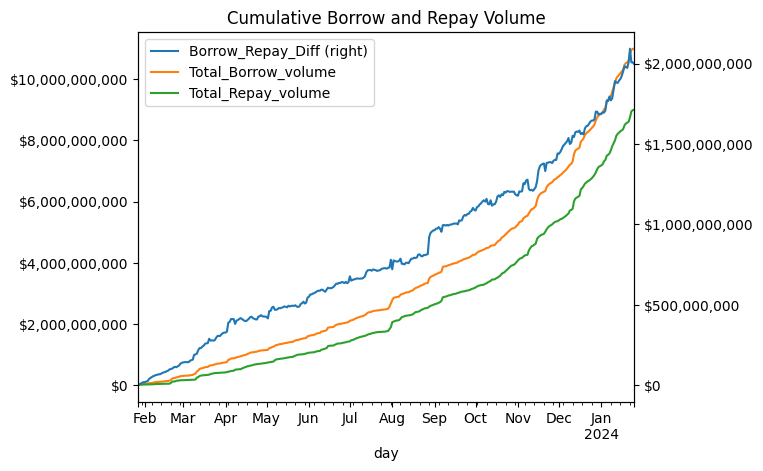

In [31]:

fig, ax = plt.subplots()
aave_raw_df = aave_raw_df.sort_index()[['Total_Borrow_volume', 'Total_Repay_volume', 'Total_Borrowers', 'Total_Repayers']]

# Calculate the cumulative difference between borrows and repays
aave_raw_df['Borrow_Repay_Diff'] = aave_raw_df['Total_Borrow_volume'] - aave_raw_df['Total_Repay_volume']

aave_cumulative_df = aave_raw_df[['Borrow_Repay_Diff','Total_Borrow_volume','Total_Repay_volume']].cumsum() 
aave_cumulative_df.plot(ax=ax, secondary_y='Borrow_Repay_Diff')

plt.title("Cumulative Borrow and Repay Volume")
ax.yaxis.set_major_formatter(money_formatter)
ax.right_ax.yaxis.set_major_formatter(money_formatter)



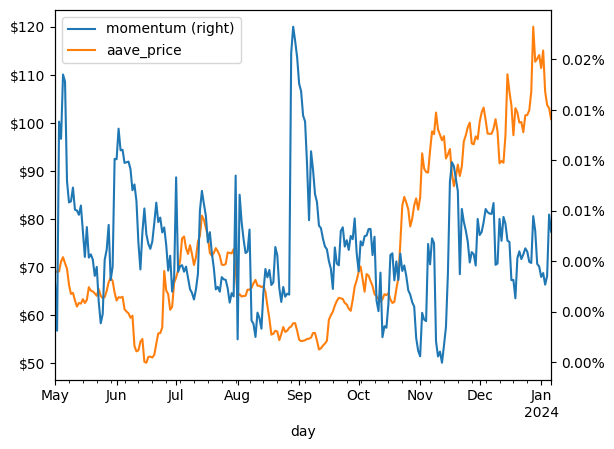

In [30]:

fig, ax = plt.subplots()
momentum = aave_cumulative_df['Borrow_Repay_Diff'].pct_change().ewm(span=20).mean()
momentum.name = 'momentum'
price_momentum = pd.merge(momentum, cum_stkAAVE_df['aave_price'], left_index=True, right_index=True)

price_momentum.loc['20230501':].plot(ax=ax, secondary_y='momentum')
ax.yaxis.set_major_formatter(money_formatter)
ax.right_ax.yaxis.set_major_formatter(percent_formatter)

